<a href="https://colab.research.google.com/github/hzhexuan/AutoImageClassifier/blob/master/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
dataset = pd.read_excel('total-stock.xlsx', 'Sheet1', index_col=None)
#series = pd.read_csv('Datasets/monthly-car-sales.csv', header=0, index_col=0)

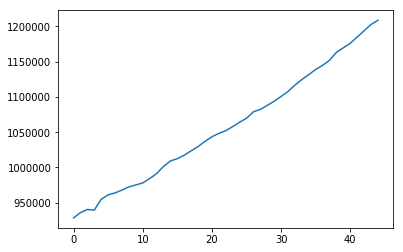

      stock
0    928440
1    935962
2    940404
3    939450
4    954920
5    961121
6    963901
7    967904
8    972400
9    975204
10   978013
11   984163
12   991179
13  1001323
14  1009130
15  1012455
16  1017386
17  1023590
18  1029670
19  1036992
20  1043460
21  1048267
22  1052111
23  1057888
24  1064109
25  1069684
26  1078941
27  1082250
28  1087952
29  1093929
30  1100690
31  1107658
32  1116745
33  1124599
34  1131594
35  1138862
36  1144784
37  1151937
38  1163193
39  1169684
40  1176081
41  1184909
42  1193737
43  1202732
44  1208755


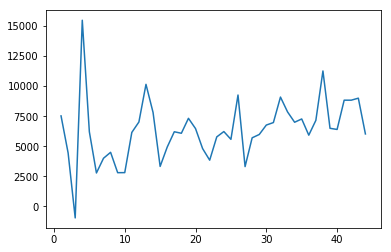

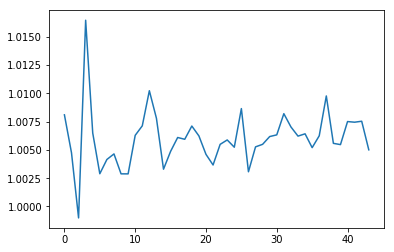

In [0]:
from matplotlib import pyplot
pyplot.plot(dataset)
pyplot.show()
print(dataset)
pyplot.plot(dataset["stock"].diff(1))
pyplot.show()
pyplot.plot(dataset["stock"].shift(-1)/dataset["stock"])

In [0]:
import numpy as np
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

def series_to_supervised(data, n_in=1, n_out=1):
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	cols.append(df.shift(-n_out+1))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values

In [0]:
#ARIMA

series = pd.DataFrame.copy(dataset)
from statsmodels.tsa.arima_model import ARIMA

temp = []
for i in range(10,-1,-1):
  train = pd.DataFrame.copy(series[:-1-i])
  model = ARIMA(train.to_numpy().reshape([-1,1]), order=(6,2,0))
  model_fit = model.fit(disp=0)
  prediction_temp =  model_fit.forecast(6)[0]
  temp.append(prediction_temp)

predict = np.stack(temp)
print(predict)
#for i in range(1,7):
#  prediction = predict[:12-i,i-1]
#  series["prediction" + str(i)] = series["stock"].to_numpy()
#  series["prediction" + str(i)][i-12:] = prediction

[[1130030.17826946 1136972.77772682 1143976.64744597 1150768.1454475
  1158544.53054306 1166958.21010456]
 [1138716.2582244  1145830.17602597 1153071.97286082 1160973.42170793
  1169452.31384627 1177302.4026199 ]
 [1145986.52320777 1153232.58414337 1161178.66593078 1169674.76746297
  1177533.80582123 1185272.48384182]
 [1151913.10191453 1159802.47610701 1167955.60553651 1175750.51110222
  1183428.42153539 1190924.5750945 ]
 [1159831.12467047 1167992.42819908 1175797.42956027 1183478.80839942
  1190977.37907899 1198118.39028273]
 [1171645.60895557 1179561.28891748 1188248.89979708 1195819.76560147
  1203125.4747775  1212312.92160772]
 [1177451.03844919 1186096.23528221 1193045.72617029 1200349.40592367
  1209468.38650838 1218386.70727579]
 [1184622.19666409 1191603.45298452 1198461.62638871 1207536.98259987
  1216397.90499722 1223393.17006033]
 [1191893.77680996 1198743.81207003 1207924.54482071 1216798.448525
  1223794.55315826 1232033.31241409]
 [1200623.99830615 1209696.0200441  1219